<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/032__Working_With_Strings_In_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 4/6: DATA CLEANING AND ANALYSIS

# MISSION 4: Working With Strings In Pandas

Learn how to work with strings in pandas.

## 1. Introduction

In the previous mission, we learned how to use the `apply()`, `map()`, and `applymap()` methods to apply a function to a series. While we could certainly use these methods to clean strings in columns, pandas has built in many vectorized string methods that can perform these tasks quicker and with less keystrokes.

We introduced some of these methods already in the Pandas Fundamentals course when we learned the following data cleaning tasks:

Cleaning column names
Extracting values from the start of strings
Extracting values from the end of strings
In this mission, we'll learn a couple other string cleaning tasks such as:

Finding specific strings or substrings in columns
Extracting substrings from unstructured data
Removing strings or substrings from a series
As we learn these tasks, we'll also work to build intuition around how these string methods operate so that you can explore methods we haven't explicitly covered on your own.

We'll work with the 2015 World Happiness Report again and additional economic data from the World Bank. You can find the data set here. Here's a preview of the data set:




[World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)

In [1]:
# Import files directly using Google Colab
# Download the files from the links below:
# World_Happiness_2015.csv: https://drive.google.com/file/d/1iZ8_lHkMx7pI22s4ECfpNHKnOohyPfvU/view?usp=sharing
# World_dev.csv: https://drive.google.com/file/d/1HVa6Aam_-U2Be1Ic6t2_ZkhMQfuzcSGz/view?usp=sharing

from google.colab import files
upload = files.upload()
upload = files.upload()

Saving World_Happiness_2015.csv to World_Happiness_2015.csv


Saving World_dev.csv to World_dev.csv


In [2]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [3]:
 # Read the csv files
 happiness2015 = pd.read_csv("World_Happiness_2015.csv")
 world_dev = pd.read_csv("World_dev.csv")

In [4]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Below are descriptions for the columns we'll be working with:

- `ShortName` - Name of the country
- `Region` - The region the country belongs to
- `IncomeGroup` - The income group the country belongs to, based on Gross National Income (GNI) per capita
- `CurrencyUnit` - Name of country's currency
- `SourceOfMostRecentIncomeAndExpenditureData` - The name of the survey used to collect the income and expenditure data
- `SpecialNotes` - Contains any miscellaneous notes about the data

To start, let's read the data sets into pandas and combine them.

**Instructions:**

We've already read `World_Happiness_2015.csv` into a dataframe called `happiness2015` and `World_dev.csv` into a dataframe called `world_dev`.

- Use the `pd.merge()` function to combine `happiness2015` and `world_dev`. Save the resulting dataframe to `merged`. As a reminder, you can use the following syntax to combine the dataframes: `pd.merge(left=df1, right=df2, how='left', left_on='left_df_Column_Name', right_on='right_df_Column_Name')`.
 - Set the `left_on` parameter to the `Country` column from `happiness2015` and the `right_on` parameter to the `ShortName` column from `world_dev`.
- Use the `DataFrame.rename()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) to rename the `SourceOfMostRecentIncomeAndExpenditureData` column in `merged` to `IESurvey` (because we don't want to keep typing that long name!).
 - We've already saved the mapping to a dictionary named `col_renaming`.
 - Make sure to set the `axis` parameter to 1.

In [5]:
# Provided code
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [6]:
# Solution to continue next chapters
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)

## 2. Using Apply to Transform Strings

In the last step, we combined `happiness2015` and `world_dev` and assigned the result to `merged`. Below are the first five rows of `merged` (after removing some of the columns we don't need)(check with DQ page):

In [7]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


Let's work with the `CurrencyUnit` column first. Suppose we wanted to extract the unit of currency without the leading nationality. For example, instead of "Danish krone" or "Norwegian krone", we just needed "krone".

If we wanted to complete this task for just one of the strings, we could use Python's `tring.split()` [method](https://docs.python.org/3/library/stdtypes.html):
```
words = 'Danish krone'

#Use the string.split() method to return the following list: ['Danish', 'krone']
listwords = words.split()

#Use the index -1 to return the last word of the list.
listwords[-1]
```
Now, to repeat this task for each element in the Series, let's return to a concept we learned in the previous mission - the `Series.apply()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html).


**Instructions:**

- Write a function called `extract_last_word` with the following criteria:
 - The function should accept one parameter called `element`.
 - Use the `string.split()` method to split the object into a list. First convert `element` to a string as follows: `str(element)`.
 - Return the last word of the list.
- Use the `Series.apply()` method to apply the function to the `CurrencyUnit` column. Save the result to `merged['Currency Apply']`.
- Use the `Series.head()` method to print the first five rows in `merged['Currency Apply']`.

In [8]:
# Solution

def extract_last_word(element):
    return str(element).split()[-1]
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

## 3. Vectorized String Methods Overview

In the last exercise, we extracted the last word of each element in the `CurrencyUnit` column using the `Series.apply()` method. However, we also learned in the last mission that we should use built-in vectorized methods (if they exist) instead of the `Series.apply()` method for performance reasons.

Instead, we could've split each element in the `CurrencyUnit` column into a list of strings with the `Series.str.split()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html), the vectorized equivalent of Python's `string.split()` method:
![img](https://s3.amazonaws.com/dq-content/346/Split.png)

In fact, pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods.

Below are some common vectorized string methods, but you can find the full list [here](https://pandas.pydata.org/pandas-docs/stable/text.html#method-summary):

|Method|Description|
|---|---|
|Series.str.split()|	Splits each element in the Series.|
|Series.str.strip()	|Strips whitespace from each string in the Series.|
|Series.str.lower()	|Converts strings in the Series to lowercase.|
|Series.str.upper()	|Converts strings in the Series to uppercase.|
|Series.str.get()	|Retrieves the ith element of each element in the Series.|
|Series.str.replace()	|Replaces a regex or string in the Series with another string.|
|Series.str.cat()	|Concatenates strings in a Series.|
|Series.str.extract()	|Extracts substrings from the Series matching a regex pattern.|

We access these vectorized string methods by adding a `str` between the Series name and method name:
![img](https://s3.amazonaws.com/dq-content/346/Syntax.png)

The `str` attribute indicates that each object in the Series should be treated as a string, without us having to explicitly change the type to a string like we did when using the `apply` method.

Note that we can also slice each element in the Series to extract characters, but we'd still need to use the `str` attribute. For example, below we access the first five characters in each element of the `CurrencyUnit` column:



In [9]:
merged['CurrencyUnit'].str[0:5]

0      Swiss
1      Icela
2      Danis
3      Norwe
4      Canad
       ...  
153    Rwand
154    West 
155      NaN
156    Burun
157    West 
Name: CurrencyUnit, Length: 158, dtype: object

It's also good to know that vectorized string methods can be chained. For example, suppose we needed to split each element in the `CurrencyUnit` column into a list of strings using the `Series.str.split()` method and capitalize the letters using the `Series.str.upper()` method. You can use the following syntax to apply more than one method at once:



In [10]:
merged['CurrencyUnit'].str.upper().str.split()

0                   [SWISS, FRANC]
1                 [ICELAND, KRONA]
2                  [DANISH, KRONE]
3               [NORWEGIAN, KRONE]
4               [CANADIAN, DOLLAR]
                  ...             
153               [RWANDAN, FRANC]
154    [WEST, AFRICAN, CFA, FRANC]
155                            NaN
156               [BURUNDI, FRANC]
157    [WEST, AFRICAN, CFA, FRANC]
Name: CurrencyUnit, Length: 158, dtype: object

However, don't forget to include `str` before each method name, or you'll get an error!

**Instructions:**

- Use the `Series.str.split()` method to split the `CurrencyUnit` column into a list of words and then use the `Series.str.get()` method to select just the last word. Assign the result to `merged['Currency Vectorized']`.
- Use the `Series.head()` method to print the first five rows in `merged['Currency Vectorized']`.

In [11]:
# Solution

merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
print(merged['Currency Vectorized'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


## 4. Exploring Missing Values with Vectorized String Methods

We learned that using vectorized string methods results in:

1. Better performance
2. Code that is easier to read and write

Let's explore another benefit of using vectorized string methods next. Suppose we wanted to compute the length of each string in the `CurrencyUnit` column. If we use the `Series.apply()` method, what happens to the missing values in the column?

First, let's use the `Series.isnull()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isnull.html) to confirm if there are any missing values in the column:



In [12]:
merged['CurrencyUnit'].isnull().sum()

13

So, we know that the `CurrencyUnit` column has 13 missing values.

Next, let's create a function to return the length of each currency unit and apply it to the `CurrencyUnit` column:



In [13]:
def compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

Then, we can check the number of missing values in the result by setting the `dropna` parameter in the `Series.value_counts()` method to False:

In [14]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

Since the original column had 13 missing values and *`NaN` doesn't appear in the list of unique values above*, we know our function must have treated `NaN` as a string and returned a length of `3` for each `NaN` value. This doesn't make sense - missing values shouldn't be treated as strings. They should instead have been *excluded* from the calculation.

If we wanted to exclude missing values, we'd have to update our function to something like this:

In [15]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

Let's confirm the behavior of pandas' vectorized string methods next.

**Instructions:**

- Use the `Series.str.len()` method to return the length of each element in the `CurrencyUnit` column. Assign the result to `lengths`.
- Use the `Series.value_counts()` method to return the count of unique values in `lengths`. Set the `dropna` parameter to False so `NaN`s are counted, too. Assign the result to `value_counts`.
 - If `value_counts` contains `NaN`s, it means the `Series.str.len()` method *excluded* them and didn't treat them as strings.

In [16]:
# Solution

lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

## 5. Finding Specific Words in Strings

In the last exercise, we identified a third benefit of using vectorized string methods - they exclude missing values:

1. Better performance
2. Code that is easier to read and write
3. Automatically excludes missing values

Now that we know the benefits of using vectorized string methods, let's practice using them for specific data cleaning tasks.

Suppose we needed to parse the elements of a Series to find a string or substring that doesn't appear in the same position in each string. For example, let's look at the `SpecialNotes` column. A number of rows mention "national accounts", but the words appear in different places in each comment:
```
April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.
```


If we wanted to determine how many comments contain this phrase, could we split them into lists? Since the formats are different, how could we tell which element contains the "national accounts" phrase?

We can handle problems like this with regul**ar expressions**, or **regex** for short. A regular expression is a sequence of characters that describes a search pattern, used to match characters in a string:
![img](https://s3.amazonaws.com/dq-content/346/Regular_Expressions.png)

In pandas, regular expression is integrated with vectorized string methods to make finding and extracting patterns of characters easier. However, the rules for creating regular expressions can be quite complex, so don't worry about memorizing them. In this mission, we'll provide guidance on how to create the regex we need to use for the exercises, but you can also follow along using this documentation.

**Instructions:**

We've already saved the regex to a variable called `pattern`. The brackets, `[]`, indicate that either "national accounts" or "National accounts" should produce a match.

- Use the `Series.str.contains()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to search for `pattern` in the `SpecialNotes` column. Assign the result to `national_accounts`.
- Use the `Series.head()` method to print the first five rows in `national_accounts`.


In [17]:
# Provided code
pattern = r"[Nn]ational accounts"

In [18]:
# Solution

national_accounts = merged['SpecialNotes'].str.contains(pattern)
print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


## 6. Finding Specific Words in Strings Continued

In the last screen, we used the `Series.str.contains()` method to see if a specific phrase appeared in a series. The result was a series containing `True`, `False`, and missing values:



In [19]:
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts")

#Return the value counts for each value in the Series, including missing values.
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

Now, we should be able to use boolean indexing to return only the rows that contain "national accounts" or "National accounts" in the `SpecialNotes` column:

In [20]:
merged[national_accounts]

ValueError: ignored

It looks like we got an error now because of the `NaN` values! One way we could fix this is to change the `NaN` values to False in `national_accounts`.

![img](https://s3.amazonaws.com/dq-content/346/Missing_values.svg)

Let's practice a way we can easily make this change.

**Instructions:**

- Use the `Series.str.contains()` method to search for `pattern` in the `SpecialNotes` column again. This time, also pass in the `na` parameter and set it to False. Assign the result to `national_accounts`.
- Use `national_accounts` to index `merged`, so that only rows that contain "national accounts" or "National accounts" in the `SpecialNotes` column are returned. Assign the result to `merged_national_accounts`.
- Use the DataFrame.head() method to print the first five rows in `merged_national_accounts`.

In [21]:
# Provided code

pattern = r"[Nn]ational accounts"

In [22]:
# Solution

national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False)
merged_national_accounts = merged[national_accounts]
print(merged_national_accounts.head())

          Country                   Region_x  ...  Currency Apply  Currency Vectorized
4          Canada              North America  ...          dollar               dollar
7          Sweden             Western Europe  ...           krona                krona
8     New Zealand  Australia and New Zealand  ...          dollar               dollar
9       Australia  Australia and New Zealand  ...          dollar               dollar
14  United States              North America  ...          dollar               dollar

[5 rows x 45 columns]


## 7. Extracting Substrings from a Series

In the last screen, we learned how to use regular expressions and the `Series.str.contains()` method to search for patterns of characters in a column and index the dataframe based on the matches. Let's continue exploring the versatility of regular expressions while learning a new task - extracting characters from strings.

Suppose we wanted to extract any year mentioned in the `SpecialNotes` column. Notice that the characters in a year follow a specific pattern:

![img](https://s3.amazonaws.com/dq-content/346/Years.png)

The first digit can be either `1` or `2`, while the last three digits can be any number between `0` and `9`.

With regular expressions, we use the following syntax to indicate a character could be a range of numbers:
```
pattern = r"[0-9]"
```
And we use the following syntax to indicate a character could be a range of letters:
```
#lowercase letters
pattern1 = r"[a-z]"

#uppercase letters
pattern2 = r"[A-Z]"
```

We could also make these ranges more restrictive. For example, if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax:
```
pattern = r"[1-6][a-z][a-z]"
```
If we have a pattern that repeats, we can also use curly brackets `{` and `}` to indicate the number of times it repeats:

```
pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"
```

Let's explore the `Series.str.extract()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html).

**Instructions:**

- Create a regular expression that will match years and assign it to the variable `pattern`. Note: we've already set up the `pattern` variable. Insert your answer inside the parantheses: `"(your_answer)"`.
- Use `pattern` and the `Series.str.extract()` method to extract years from the `SpecialNotes` column. Assign the resulting Series to `years`.

In [23]:
# Provided code

pattern =r"()"

In [24]:
# Solution

pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)

## 8. Extracting Substrings from a Series Continued

In the last exercise, we learned how to identify more complex patterns with regular expressions and extract substrings from a column using that pattern.

When we used the `Series.str.extract()` method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a **capturing group**.

![img](https://s3.amazonaws.com/dq-content/346/Parantheses.png)

If the capturing group doesn't exist in a row (or there is no match) the value in that row is set to `NaN` instead. As a result, the Series returned looked like this:

![img](https://s3.amazonaws.com/dq-content/346/Extracting_Results.png)

We can also return the results as a dataframe by changing the `expand` parameter to True.




**Instructions:**

Use `pattern` and the `ΩSeries.str.extract()` method to extract years from the `SpecialNotes` column again, but this time, set the `expand` parameter to `True` to return the results as a dataframe. Assign the resulting dataframe to `years`.

In [25]:
# Provided code
pattern = r"([1-2][0-9]{3})"

In [26]:
# Solution

years = merged['SpecialNotes'].str.extract(pattern, expand=True)

## 9. Extracting All Matches of a Pattern from a Series

In the last screen, we learned we could use the `Series.str.extract()` method to extract a pattern of characters from a column as a dataframe by setting the `expand` parameter equal to `True`. However, the `Series.str.extract()` method will only extract the *first* match of the pattern. If we wanted to extract all of the matches, we can use the `Series.str.extractall()` [method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html).

We'll demonstrate this method but, first, let's make the results easier to read by using the `df.set_index()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html) to set the `Country` column as the index.

```
merged = merged.set_index('Country')
```

Next, let's use the same regular expression from the last screen to extract all the years from the `Special Notes` column, except this time, we'll use a **named capturing group**. Using a named capturing group means that we can refer to the group by the specified name instead of just a number. We can use the following syntax to add a name: `(?P<Column_Name>...)`.

Below, we name the capturing group `Years`:
```
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern)
```

Below are the first five rows of the output:
[img](https://s3.amazonaws.com/dq-content/346/Extractall.png)
Let's look at the `IESurvey` column next. This column has years in two different formats:
```
Integrated household survey (IHS), 2012
Integrated household survey (IHS), 2010/11
```
Let's test the code above on this column to see if we can extract all of the years from the `IESurvey` column.

**Instructions:**

We've already set the `Country` column as the index and saved the regular expression used to extract years in the `pattern` variable.

- Use the `Series.str.extractall()` method to extract all of the years in the `IESurvey`. Assign the result to `years`.
- Use the `Series.value_counts()` method to create a list of the unique years, along with the count. Assign the result to `value_counts`. Print `value_counts`.

In [27]:
# Provided code
pattern = r"(?P<Years>[1-2][0-9]{3})"

In [28]:
# Solution

years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2006     1
1995     1
2002     1
1992     1
2003     1
1999     1
1998     1
2000     1
Name: Years, dtype: int64


## 10. Extracting More Than One Group of Patterns from a Series

When we tried to extract all of the years from the `IESurvey` column using the `extractall` method in the last exercise, we were unsuccessful because some of our years had the following format:

![img](https://s3.amazonaws.com/dq-content/346/Years_updated.png)



Because our regular expression only accounted for the pattern highlighted below, we created a dataframe with just the first year in each row:

![img](https://s3.amazonaws.com/dq-content/346/Years_first_group.png)

If we wanted to extract the second, abbreviated year, we'd have to specify two more groups - one to extract the `/` and one to extract the last two digits.

![img](https://s3.amazonaws.com/dq-content/346/Years_all_groups.png)

Let's add those two groups to our regex and try to extract them again:

```
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
```

Note that we also added a question mark, `?`, after each of the two new groups to indicate that a match for those groups is optional. This allows us to extract years listed in the `yyyy` format AND the `yyyy/yy` format at once.

Below are the first five rows:

|..|
|---|


If we sort the values, we can confirm that we also extracted years in the `yyyy/yy` format:



In [29]:
years.sort_values('Second_Year')

KeyError: ignored

The dataframe returned has three columns - one for each capturing group specified in `pattern`. Because we didn't name the second group, `(/)`, the capturing group number, `1`, was used as the column name.

In the next exercise, we'll extract just the years from the `IESurvey` column. Then, we'll reformat the second year so that it contains all four digits of the year, not just the last two, so that it looks like the dataframe below:

|..|
|---|


**Instructions:**

We've already created a regular expression that extracts the pattern "yyyy/yy" and saved it to a variable called `pattern`. Notice that we didn't enclose `/?` in parantheses so that the resulting dataframe will only contain a `First_Year` and `Second_Year` column.

- Use the `Series.str.extractall()` method to extract `pattern` from the `IESurvey` column. Assign the result to `years`.
- Use vectorized slicing to extract the first two numbers from the `First_Year` column in `years` (For example, extract "20" from "2000"). Assign the result to `first_two_year`.
- Add `first_two_year` to the `Second_Year` column in `years`, so that `Second_Year` contains the full year (ex: "2000"). Assign the result to `years['Second_Year']`.

In [30]:
# Provided code
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

In [31]:
# Solution

years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

## 11. Challenge: Clean a String Column, Aggregate the Data, and Plot the Results

Let's summarize what we learned about the `Series.str.extractall()` method and pandas string operations in the last exercise:

1. If part of the regex isn't grouped using parantheses, `()`, it won't be extracted.
2. When we add a string to a column using the plus sign, `+`, pandas will add that string to every value in the column. Note that the strings will be added together without any spaces.

Unfortunately, there are too many possible string cleaning tasks for us to review each one in detail. However, now that we have a general understanding of how string methods operate, we can apply our knowledge to tasks we haven't covered explicitly in this mission.

Next, we'll group `merged` by the `IncomeGroup` column and plot the results. First, however, we would like to clean the values in the `IncomeGroup` column to a standardized format shown in the table below.



|Current Values|Updated Values|
|---|---|
|Upper middle income|	UPPER MIDDLE|
|Lower middle income|	LOWER MIDDLE
|High income: OECD|	HIGH OECD
|Low income	|LOW
|High income: nonOECD	|HIGH NONOECD

After, we'll create a pivot table:

In [32]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

Finally, we'll plot the results as follows:

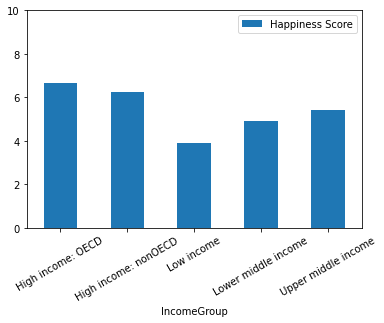

In [33]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))

The result should match the bar chart below:
![img](https://s3.amazonaws.com/dq-content/346/Income_Plot.png)

Let's use some of the vectorized string methods below to update the values in the `IncomeGroup` column next:

|Method|	Description|
|---|---|
|Series.str.split()|	Splits each element in the Series.
|Series.str.strip()|	Strips whitespace from each string in the Series.
|Series.str.lower()|	Converts strings in the Series to lowercase.
|Series.str.upper()|	Converts strings in the Series to uppercase.
|Series.str.get()|	Retrieves the ith element of each element in the Series.
|Series.str.replace()|	Replaces a regex or string in the Series with another string.
|Series.str.cat()|	Concatenates strings in a Series.
|Series.str.extract()|	Extracts substrings from the Series matching a regex pattern.

**Instructions:**

As a reminder, we would like to clean the values in the `IncomeGroup` column to a standardized format shown in the table below.

|Current Values |Updated Values
|---|---|
|Upper middle income	|UPPER MIDDLE
|Lower middle income	|LOWER MIDDLE
|High income: OECD	|HIGH OECD
|Low income	|LOW
|High income: nonOECD	|HIGH NONOECD

- Use some of the string methods above to clean the `IncomeGroup` column.
 - Make sure to remove the whitespace at the end of the strings.
- Use the `df.pivot_table()` method to return the mean of each income group in the `IncomeGroup` column. Set the `index` parameter equal to the `IncomeGroup` column and the `values` parameter equal to the `Happiness Score` column. Assign the result to `pv_incomes`.
- Use the `df.plot()` method to plot the results. Set the `kind` parameter equal to `bar`, the `rot` parameter equal to `30`, and the `ylim` parameter equal to `(0,10)`.

NameError: ignored

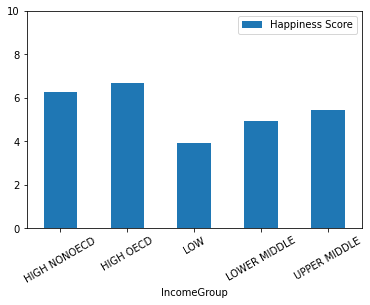

In [34]:
# Solution

merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()

---
In this mission, we explored the benefits of using vectorized string methods, along with a couple methods that can be used to perform tasks such as finding substrings, extracting substrings, and removing substrings from columns. You can find the full list of vectorized string methods [here](https://pandas.pydata.org/pandas-docs/stable/text.html#method-summary). We encourage you to explore more string methods or string cleaning tasks independently.

In the next mission, we'll return to another important data cleaning task - how to handle missing values.